## Project 2

For my analysis, I kept it simple, and decided to dive further into the given alignment data. 
Specifically, I analyzed four sets of aligned sequences, in decreasing order of distance to the 
concensus sequence.


### Imports

In [68]:
!pip install biopython
import numpy as np
from Bio.Phylo.TreeConstruction import DistanceMatrix
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import Phylo
import pandas as pd

### Loading the given data from the position table

In [66]:
position_table = pd.read_csv('../../data/position_table.csv')

In [39]:
results = position_table.describe()
results

,seqid,S_1_1,S_1_2,S_1_3,S_2_1,S_2_2,S_2_3,S_3_1,S_3_2,S_3_3,...,S_1270_3,S_1271_1,S_1271_2,S_1271_3,S_1272_1,S_1272_2,S_1272_3,S_1273_1,S_1273_2,S_1273_3
count,677,677,677,677,677,677,677,677,677,677,...,677,677,677,677,677,677,677,677,677,677
unique,677,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,MT019531.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
freq,1,677,677,677,677,677,677,677,677,677,...,677,677,677,677,677,677,677,677,677,677


In [40]:
position_table

,seqid,S_1_1,S_1_2,S_1_3,S_2_1,S_2_2,S_2_3,S_3_1,S_3_2,S_3_3,...,S_1270_3,S_1271_1,S_1271_2,S_1271_3,S_1272_1,S_1272_2,S_1272_3,S_1273_1,S_1273_2,S_1273_3
0,MT007544.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
1,MT019529.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
2,MT019530.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
3,MT019531.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
4,MT019532.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,MT334544.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
673,MT334546.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
674,MT334547.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
675,MT334557.1,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A


### Pull out the concensus sequence

In [41]:
concensus_seq = position_table.drop('seqid',axis=1).mode(axis=0).T[0]
concensus_seq

S_1_1       A
S_1_2       T
S_1_3       G
S_2_1       T
S_2_2       T
           ..
S_1272_2    A
S_1272_3    C
S_1273_1    A
S_1273_2    C
S_1273_3    A
Name: 0, Length: 3819, dtype: object

In [42]:
position_table = position_table.set_index('seqid')

### Determine which samples are farthest from the concensus sequence

In [50]:
distance_from_concensus_seq = position_table.apply(lambda row: sum(row != concensus_seq),axis=1)
distance_from_concensus_seq_sorted = distance_from_concensus_seq.sort_values(ascending=False)
distance_from_concensus_seq_sorted

seqid
MT233522.1    82
MT308696.1    71
MT308694.1    53
MT263453.1    48
MT259284.1    33
              ..
MT326081.1     0
MT263395.1     0
MT263396.1     0
MT263398.1     0
MT262916.1     0
Length: 677, dtype: int64

### Select Sets of sequences

Here I break from the outline, and I pull out four sets of distance data from the sorted list.
All the following analysis will be in order of decreasing distance from the concensus sequence, since
that is how the data is sorted.

I also decided to look at the data in groups of eight instead of ten, since that will allow us to see the graphs better

In [70]:
subset_seqs = []
for i in range(0, 32, 8):
    subset_seqs.append(distance_from_concensus_seq_sorted[i:i + 8].index)
subset_seqs

[Index(['MT233522.1', 'MT308696.1', 'MT308694.1', 'MT263453.1', 'MT259284.1',
        'MT293180.1', 'MT263436.1', 'MT293224.1'],
       dtype='object', name='seqid'),
 Index(['MT326129.1', 'MT259277.1', 'MT263431.1', 'MT293213.1', 'MT293196.1',
        'MT326134.1', 'MT293200.1', 'MT293158.1'],
       dtype='object', name='seqid'),
 Index(['MT246456.1', 'MT293198.1', 'MT326176.1', 'MT320538.1', 'MT322421.1',
        'MT334557.1', 'MT322422.1', 'MT012098.1'],
       dtype='object', name='seqid'),
 Index(['MT325596.1', 'MT322423.1', 'MT246482.1', 'MT326090.1', 'MT259249.1',
        'MT263384.1', 'MT259281.1', 'MT326092.1'],
       dtype='object', name='seqid')]

### Calculate distances for each set of sequences

In [55]:
def calc_distances(subset_seqs):
    distances = {}
    for i,seqid1 in enumerate(subset_seqs):
        distances[seqid1,seqid1]=0
        for j in range(i+1,len(subset_seqs)):
            seqid2 = subset_seqs[j]
            distances[seqid1,seqid2] = sum(position_table.loc[seqid1] != position_table.loc[seqid2])
            distances[seqid2,seqid1] = distances[seqid1,seqid2]
    distances = pd.Series(distances).unstack()
    return distances
    
distance_sets = [calc_distances(sequence) for sequence in subset_seqs]
distance_sets

[            MT233522.1  MT259284.1  MT263436.1  MT263453.1  MT293180.1  \
 MT233522.1           0         115          90         130         104   
 MT259284.1         115           0          43          81          47   
 MT263436.1          90          43           0          58          32   
 MT263453.1         130          81          58           0          68   
 MT293180.1         104          47          32          68           0   
 MT293224.1          90          43           0          58          32   
 MT308694.1         135          86          63         101          77   
 MT308696.1         151         104          79         119          93   
 
             MT293224.1  MT308694.1  MT308696.1  
 MT233522.1          90         135         151  
 MT259284.1          43          86         104  
 MT263436.1           0          63          79  
 MT263453.1          58         101         119  
 MT293180.1          32          77          93  
 MT293224.1           0

As you can see, the distances from the concensus sequence drop off rapidly.

In [71]:
def create_matrix(distances):
    matrix = np.tril(distances.values).tolist()
    for i in range(len(matrix)):
        matrix[i] = matrix[i][:i+1]
    dm = DistanceMatrix(list(distances.index), matrix)
    return dm
matrixs = [create_matrix(distances) for distances in distance_sets]
matrixs

[DistanceMatrix(names=['MT233522.1', 'MT259284.1', 'MT263436.1', 'MT263453.1', 'MT293180.1', 'MT293224.1', 'MT308694.1', 'MT308696.1'], matrix=[[0], [115, 0], [90, 43, 0], [130, 81, 58, 0], [104, 47, 32, 68, 0], [90, 43, 0, 58, 32, 0], [135, 86, 63, 101, 77, 63, 0], [151, 104, 79, 119, 93, 79, 22, 0]]),
 DistanceMatrix(names=['MT259277.1', 'MT263431.1', 'MT293158.1', 'MT293196.1', 'MT293200.1', 'MT293213.1', 'MT326129.1', 'MT326134.1'], matrix=[[0], [0, 0], [19, 19, 0], [0, 0, 19, 0], [1, 1, 18, 1, 0], [0, 0, 19, 0, 1, 0], [0, 0, 19, 0, 1, 0, 0], [1, 1, 18, 1, 0, 1, 1, 0]]),
 DistanceMatrix(names=['MT012098.1', 'MT246456.1', 'MT293198.1', 'MT320538.1', 'MT322421.1', 'MT322422.1', 'MT326176.1', 'MT334557.1'], matrix=[[0], [13, 0], [13, 18, 0], [9, 14, 14, 0], [8, 13, 13, 7, 0], [8, 13, 13, 7, 0, 0], [12, 17, 17, 13, 12, 12, 0], [8, 13, 13, 7, 6, 6, 12, 0]]),
 DistanceMatrix(names=['MT246482.1', 'MT259249.1', 'MT259281.1', 'MT263384.1', 'MT322423.1', 'MT325596.1', 'MT326090.1', 'MT326092

### Construct a tree for each distance matrix

In [63]:
def make_tree(dm):
    constructor = DistanceTreeConstructor()
    tree = constructor.nj(dm)
    return tree

trees = [make_tree(dm) for dm in matrixs]
trees

[Tree(rooted=False),
 Tree(rooted=False),
 Tree(rooted=False),
 Tree(rooted=False)]

### Draw a tree for each matrix

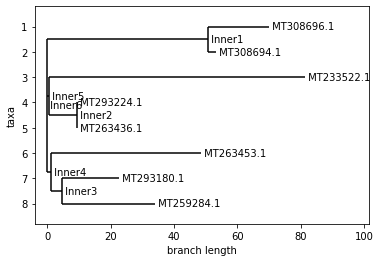

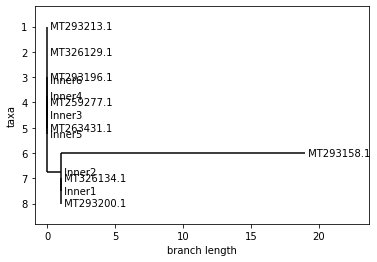

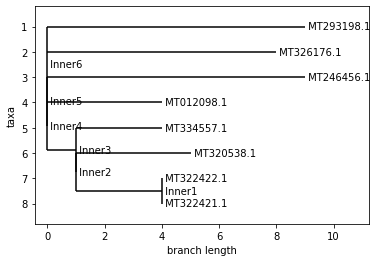

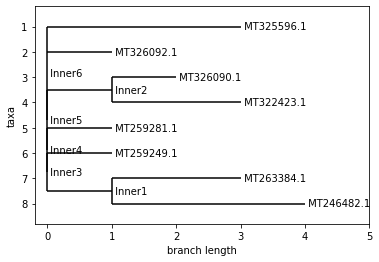

In [73]:
%matplotlib inline

def draw_tree(tree):
    tree.ladderize()
    Phylo.draw(tree)

for tree in trees:
    draw_tree(tree)

This shows us visually that branch length drops off rapidly, with only the first few longest branches being 
over 50 in length. After that point, branch length stays well below 10, and only continues to decrease.